# **Importacion de Recursos**

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import pprint as pprint

In [ ]:
# Montar Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Ruta correcta al archivo Excel en tu Google Drive
path_dataset = '/content/gdrive/MyDrive/Estadistica y Probabilidad/expectativa-vida.xlsx'

# Leer el archivo Excel usando pd.read_excel()
data = pd.read_excel(path_dataset)

# **Trasformaciones Esenciales**

In [ ]:
# Crear un diccionario para mapear los nombres de las columnas
nombres_columnas = {
    'Country': 'País',
    'Year': 'Año',
    'Status': 'Estado',
    'Life expectancy ': 'Esperanza de vida',
    'Adult Mortality': 'Mortalidad adulta',
    'infant deaths': 'Muertes infantiles',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Gasto en porcentaje',
    'Hepatitis B': 'Hepatitis B',
    'Measles ': 'Sarampión',
    ' BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    'Polio': 'Polio',
    'Total expenditure': 'Gasto total',
    'Diphtheria ': 'Difteria',
    ' HIV/AIDS': 'VIH/SIDA',
    'GDP': 'PIB',
    'Population': 'Población',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Composición de ingresos de recursos',
    'Schooling': 'Escolarización'
}

# Cambiar los nombres de las columnas usando el método rename()
data = data.rename(columns=nombres_columnas)

In [ ]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(data.isnull().sum())


Valores nulos en el dataset:
País                                     0
Año                                      0
Estado                                   0
Esperanza de vida                       10
Mortalidad adulta                       10
Muertes infantiles                       0
Alcohol                                194
Gasto en porcentaje                      0
Hepatitis B                            553
Sarampión                                0
IMC                                     34
Muertes menores de cinco años            0
Polio                                   19
Gasto total                            226
Difteria                                19
VIH/SIDA                                 0
PIB                                    448
Población                              652
Delgadez 1-19 años                      34
Delgadez 5-9 años                       34
Composición de ingresos de recursos    167
Escolarización                         163
dtype: int64


In [ ]:
# Verificar la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 2938 non-null   object 
 1   Año                                  2938 non-null   int64  
 2   Estado                               2938 non-null   object 
 3   Esperanza de vida                    2928 non-null   float64
 4   Mortalidad adulta                    2928 non-null   float64
 5   Muertes infantiles                   2938 non-null   int64  
 6   Alcohol                              2744 non-null   float64
 7   Gasto en porcentaje                  2938 non-null   float64
 8   Hepatitis B                          2385 non-null   float64
 9   Sarampión                            2938 non-null   int64  
 10  IMC                                  2904 non-null   float64
 11  Muertes menores de cinco años 

In [ ]:
# Obtenemos informacion sobre filas y columnas. resultSet(filas, columnas)
data.shape

(2938, 22)

In [ ]:
# Eliminar filas con valores NaN e infinitos
data_clean = data.dropna()  # Elimina filas con valores NaN
data_clean = data_clean.replace([np.inf, -np.inf], np.nan).dropna()  # Elimina filas con valores infinitos

In [ ]:
data.shape

(2938, 22)

# **Análisis Descriptivo - Variables Estadisticas**

In [ ]:
# Verificar la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 2938 non-null   object 
 1   Año                                  2938 non-null   int64  
 2   Estado                               2938 non-null   object 
 3   Esperanza de vida                    2928 non-null   float64
 4   Mortalidad adulta                    2928 non-null   float64
 5   Muertes infantiles                   2938 non-null   int64  
 6   Alcohol                              2744 non-null   float64
 7   Gasto en porcentaje                  2938 non-null   float64
 8   Hepatitis B                          2385 non-null   float64
 9   Sarampión                            2938 non-null   int64  
 10  IMC                                  2904 non-null   float64
 11  Muertes menores de cinco años 

**Variables Cualitativas Nominales:**

País (object)

Estado (object)

**Variables Cuantitativas Discretas:**

Año (int64)

Muertes infantiles (int64)

Sarampión (int64)

Muertes menores de cinco años (int64)

**Variables Cuantitativas Continuas:**

Esperanza de vida (float64)

Mortalidad adulta (float64)

Alcohol (float64)

Gasto en porcentaje (float64)

Hepatitis B (float64)

IMC (float64)

Polio (float64)

Gasto total (float64)

Difteria (float64)

VIH/SIDA (float64)

PIB (float64)

Población (float64)

Delgadez 1-19 años (float64)

Delgadez 5-9 años (float64)

Composición de ingresos de recursos (float64)

Escolarización (float64)

In [ ]:
data.describe()

,Año,Esperanza de vida,Mortalidad adulta,Muertes infantiles,Alcohol,Gasto en porcentaje,Hepatitis B,Sarampión,IMC,Muertes menores de cinco años,Polio,Gasto total,Difteria,VIH/SIDA,PIB,Población,Delgadez 1-19 años,Delgadez 5-9 años,Composición de ingresos de recursos,Escolarización
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2.938000e+03,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2.490000e+03,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,2.854762e+09,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,1.671906e+09,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,2.754542e+09,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,2.334319e+09,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.145600e+02,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,1.597777e+08,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,1.179419e+08,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,2.047150e+09,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,4.707527e+08,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,4.696168e+09,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,2.494125e+09,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,9.983498e+09,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,9.988227e+09,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# **Análisis Univariado**

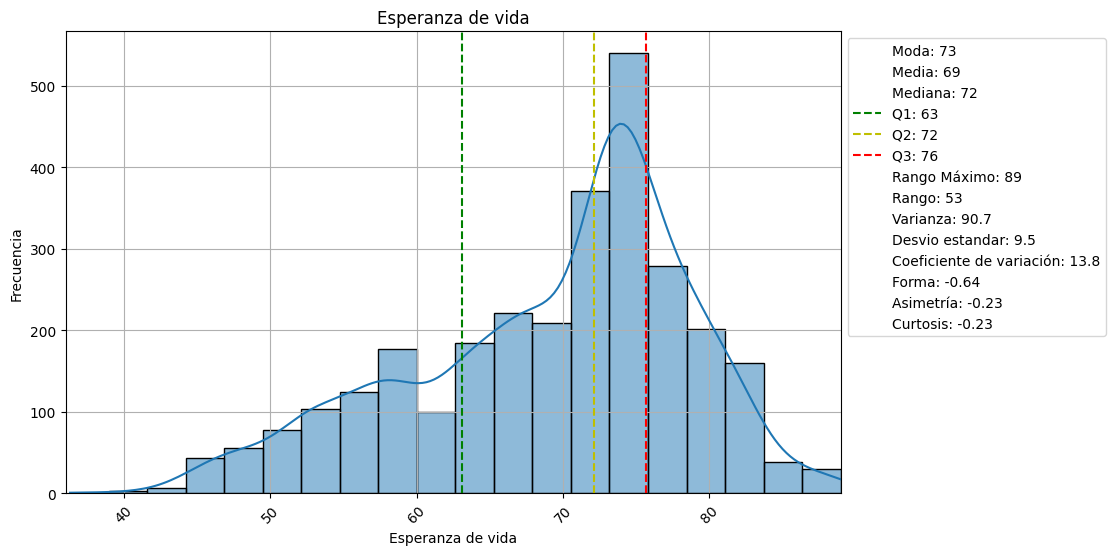

In [ ]:
# Nombre de la columna
columna = 'Esperanza de vida'

#  Medidadas de centralización
moda = data[columna].mode().iloc[0]
media = data[columna].mean()
mediana = data[columna].median()

# Cuartiles
Q1 = data[columna].quantile(0.25)
Q2 = data[columna].quantile(0.50)
Q3 = data[columna].quantile(0.75)

# Determinar el número de modas
frecuencias = data[columna].value_counts()
numero_de_modas = len(frecuencias[frecuencias == frecuencias.max()])

# Medidas de Dispersión
rango_max = data[columna].max()
rango_min = data[columna].min()
rango = data[columna].max() - data[columna].min()
varianza = data[columna].var()
desvio_estandar = data[columna].std()
coef_variacion = (desvio_estandar / data[columna].mean()) * 100

# Forma
forma = data[columna].skew()
asimetria = data[columna].kurtosis()
curtosis = data[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((data[columna] >= Q1) & (data[columna] <= Q2)).sum() / len(data[columna]) * 100
concentracion_Q2_Q3 = ((data[columna] >= Q2) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100
concentracion_Q1_Q3 = ((data[columna] >= Q1) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))

sns.histplot(data[columna], bins=20, kde=True)

#Lenyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.0f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.0f}', visible=False)
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.0f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.0f}')
plt.axvline(Q2, color='y', linestyle='--', label=f'Q2: {Q2:.0f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.0f}')

plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.xlim(36, 89)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
if numero_de_modas == 1:
    print("La distribución es Unimodal.")
elif numero_de_modas == 2:
    print("La distribución es Bimodal.")
elif numero_de_modas > 2:
    print("La distribución es Multimodal.")
else:
    print("La distribución es Sin Moda.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")


**Podemos observar que la mayor densidad del histograma se encuentra en el intervalo Q1(25%) y Q3(75%).**

**Dentro de la distancia intercuartil Q3-Q1 puede decirse que la mayor concentración de datos está entre Q2 y Q3, que contiene la moda.**

**El 50% de los datos se encuentra entre 63 y 76 años (Q1 y Q3, respectivamente) mientras que el rango está comprendido entre 0 a 89 años.**

**La distribución es Unimodal.**

**La distribución es asimétrica negativa porque la moda>mediana>media.**

**La distribución es Platicúrtica.**


La distribución es Unimodal.
La distribución es Asimétrica Negativa.
La distribución es Platicúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.39% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.29% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.24% de los datos.
El rango está comprendido entre 36 y 89.


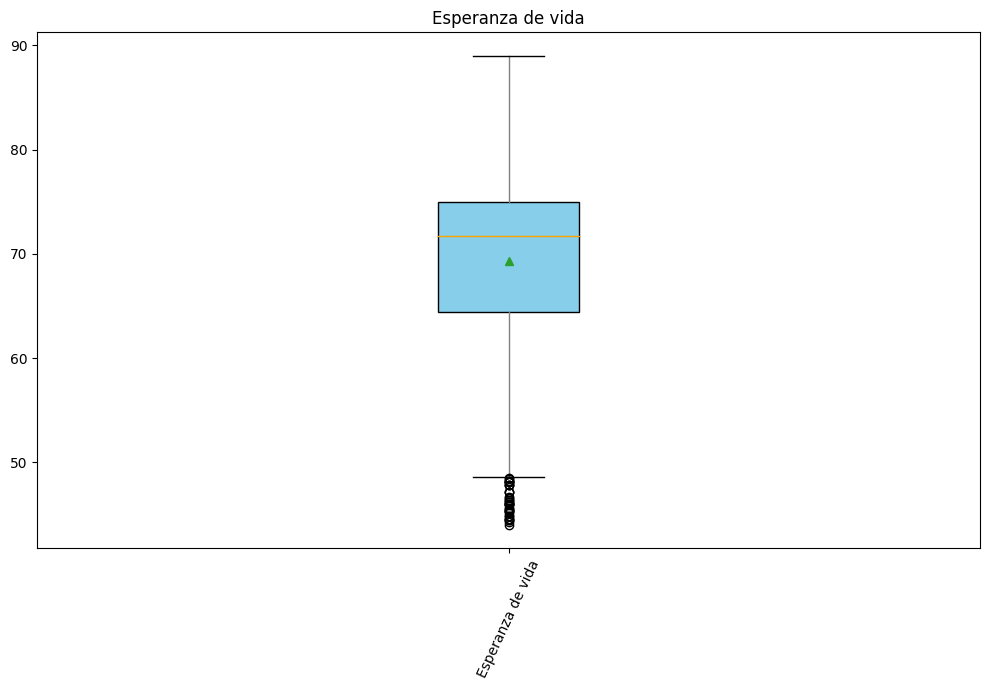

Podemos observar que para Esperanza de vida, tenemos la siguiente distribución:
Mediana: 72
Media: 69
Q1: 64
Q3: 75
Rango intercuartílico (IQR): 11
Límite del bigote superior: 91
Límite del bigote inferior: 49


In [ ]:
# Columna y datos
columnas_numericas_continuas = ['Esperanza de vida']
vals_continuas = [data_clean[col].values for col in columnas_numericas_continuas]
nombres_continuas = columnas_numericas_continuas

# Grafico
plt.figure(figsize=(10, 7))

# Estilo de las cajas y los puntos para variables continuas
plt.boxplot(vals_continuas, labels=nombres_continuas, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue'), meanprops=dict(color='green'), medianprops=dict(color='orange'), whiskerprops=dict(color='gray'))
plt.title('Esperanza de vida')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# Calcula la mediana, cuartiles y valores extremos
mediana = np.median(vals_continuas, axis=1)
media = np.mean(vals_continuas, axis=1)
Q1 = np.percentile(vals_continuas, 25, axis=1)
Q3 = np.percentile(vals_continuas, 75, axis=1)
IQR = Q3 - Q1

# Cálculo de los límites de los bigotes
bigote_superior = Q3 + 1.5 * IQR
bigote_inferior = Q1 - 1.5 * IQR

# Imprime la información numérica
for i, col in enumerate(nombres_continuas):
    print(f"Podemos observar que para {col}, tenemos la siguiente distribución:")
    print(f"Mediana: {mediana[i]:.0f}")
    print(f"Media: {media[i]:.0f}")
    print(f"Q1: {Q1[i]:.0f}")
    print(f"Q3: {Q3[i]:.0f}")
    print(f"Rango intercuartílico (IQR): {IQR[i]:.0f}")
    print(f"Límite del bigote superior: {bigote_superior[i]:.0f}")
    print(f"Límite del bigote inferior: {bigote_inferior[i]:.0f}")

**Podemos observar quee la caja contiene el 50% de los datos.Dentro de esta, entre Q1 y la mediana (Q2) se encuentran el 25% de los datos y entre la mediana (Q2) y Q3 el restante 25% de los datos.**

**Se observa una caja compacta y asimétrica, donde la mayor densidad de datos se encuentra entre los percentiles Q2 y Q3 que están relativamente cerca (donde, Q2(72) y Q3(76)) que contiene la moda coincidente con el intervalo de clase [73,76] del histograma “Esperanza de Vida”.**

**Entre los percentiles Q1 y Q2 la distancia es más grande que entre Q2-Q3. A través del análisis del boxplot se confirma que la distribución es asimétrica negativa, como fue se justificado en el análisis del histograma (moda>mediana>media), porque los datos se concentran entre Q2-Q3 y el bigote Ls es de menor tamaño que Li. Los outliers se concentran por debajo del extremo inferior del bigote Li.**

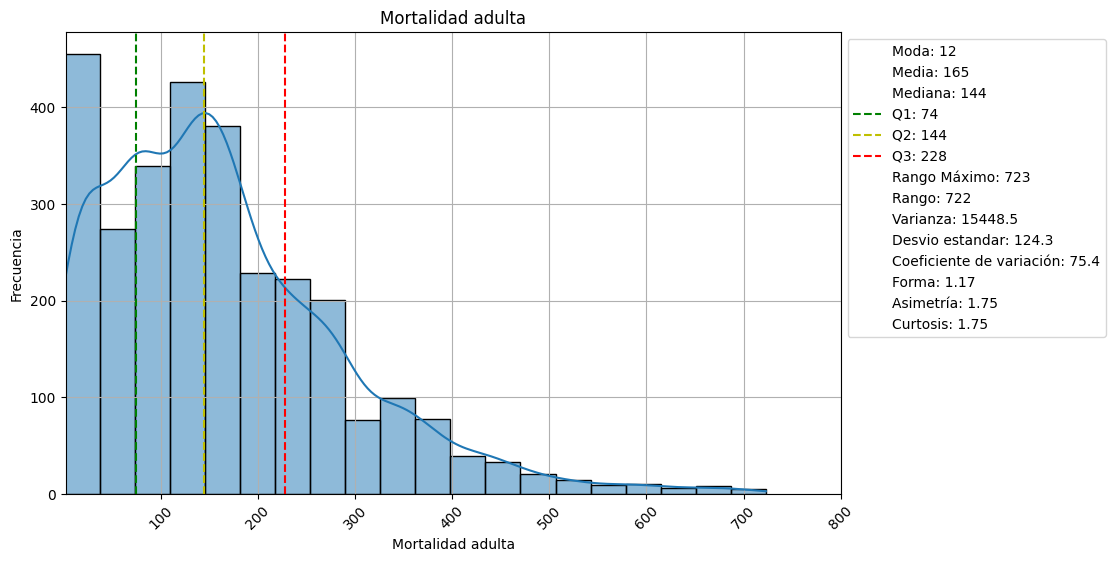

La distribución es Bimodal.
La distribución es Asimétrica Positiva.
La distribución es Platicúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.56% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.39% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.20% de los datos.
El rango está comprendido entre 1 y 723.


In [ ]:
# Nombre de la columna
columna = 'Mortalidad adulta'

#  Medidadas de centralización
moda = data[columna].mode().iloc[0]
media = data[columna].mean()
mediana = data[columna].median()

# Cuartiles
Q1 = data[columna].quantile(0.25)
Q2 = data[columna].quantile(0.50)
Q3 = data[columna].quantile(0.75)

# Medidas de Dispersión
rango_max = data[columna].max()
rango_min = data[columna].min()
rango = data[columna].max() - data[columna].min()
varianza = data[columna].var()
desvio_estandar = data[columna].std()
coef_variacion = (desvio_estandar / data[columna].mean()) * 100

# Forma
forma = data[columna].skew()
asimetria = data[columna].kurtosis()
curtosis = data[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((data[columna] >= Q1) & (data[columna] <= Q2)).sum() / len(data[columna]) * 100
concentracion_Q2_Q3 = ((data[columna] >= Q2) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100
concentracion_Q1_Q3 = ((data[columna] >= Q1) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))

sns.histplot(data[columna], bins=20, kde=True)

#Lenyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.0f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.0f}', visible=False)
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.0f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.0f}')
plt.axvline(Q2, color='y', linestyle='--', label=f'Q2: {Q2:.0f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.0f}')

plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.xlim(2, 800)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
print("La distribución es Bimodal.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")

**Podemos observar que la distribución está concentrada o tiene mayor densidad de datos, entre el mínimo (valor 0) y Q3. Entre el mínimo=0 y Q3=228 están comprendidas las dos modas, dentro de una distribución con un rango entre 0 y 725.**

**La distribución es bimodal. La primer moda tiene el intervalo de clase [0, 37] y la segunda moda [107, 144]. La primer moda se encuentra entre el mínimo y el Q1 y la segunda moda se encuentra entre Q1 y Q2.**

**La distribución es asimétrica positiva porque la moda<mediana<media.**

**De acuerdo al coeficiente calculado es platicúrtica.**


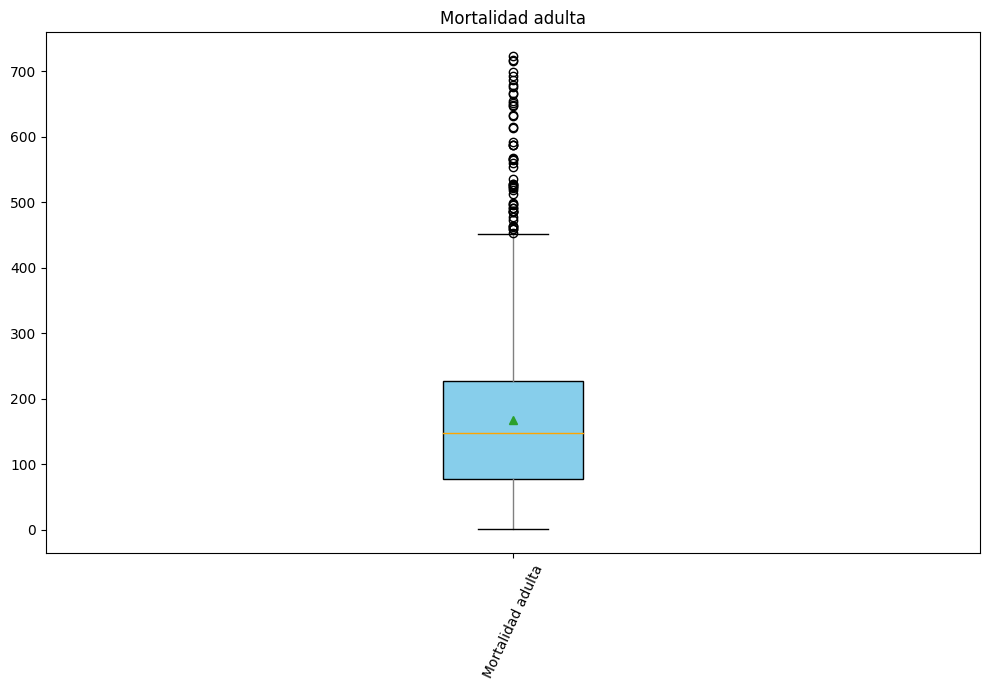

Podemos observar que para Mortalidad adulta, tenemos la siguiente distribución:
Mediana: 148
Media: 168
Q1: 77
Q3: 227
Rango intercuartílico (IQR): 150
Límite del bigote superior: 452
Límite del bigote inferior: -148


In [ ]:
# Columna y datos
columnas_numericas_continuas = ['Mortalidad adulta']
vals_continuas = [data_clean[col].values for col in columnas_numericas_continuas]
nombres_continuas = columnas_numericas_continuas

# Grafico
plt.figure(figsize=(10, 7))

# Estilo de las cajas y los puntos para variables continuas
plt.boxplot(vals_continuas, labels=nombres_continuas, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue'), meanprops=dict(color='green'), medianprops=dict(color='orange'), whiskerprops=dict(color='gray'))
plt.title('Mortalidad adulta')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# Calcula la mediana, cuartiles y valores extremos
mediana = np.median(vals_continuas, axis=1)
media = np.mean(vals_continuas, axis=1)
Q1 = np.percentile(vals_continuas, 25, axis=1)
Q3 = np.percentile(vals_continuas, 75, axis=1)
IQR = Q3 - Q1
# Cálculo de los límites de los bigotes
bigote_superior = Q3 + 1.5 * IQR
bigote_inferior = Q1 - 1.5 * IQR

# Imprime la información numérica
for i, col in enumerate(nombres_continuas):
    print(f"Podemos observar que para {col}, tenemos la siguiente distribución:")
    print(f"Mediana: {mediana[i]:.0f}")
    print(f"Media: {media[i]:.0f}")
    print(f"Q1: {Q1[i]:.0f}")
    print(f"Q3: {Q3[i]:.0f}")
    print(f"Rango intercuartílico (IQR): {IQR[i]:.0f}")
    print(f"Límite del bigote superior: {bigote_superior[i]:.0f}")
    print(f"Límite del bigote inferior: {bigote_inferior[i]:.0f}")

**Podemos observar que  la caja contiene el 50% de los datos. Dentro de esta, entre Q1 y la mediana (Q2) se encuentran el 25% de los datos y entre la mediana (Q2) y Q3 el restante 25% de los datos.**

**Se observa una caja compacta y levemente asimétrica, donde la mayor densidad de datos se encuentra entre los percentiles Q1 y Q2 que están relativamente cerca (donde, Q1(74) y Q2(144)) que contiene la moda coincidente con el intervalo de clase [109, 144].**

**Entre los percentiles Q2 y Q3 la distancia es levemente mas grande que entre Q1-Q2. A través del análisis del boxplot se confirma que la distribución es asimétrica positiva, como fue se justificado en el análisis del histograma (moda<mediana<media), porque los datos se concentran entre Q1-Q2 y el bigote Li es de menor tamaño que Ls. Los outliers se concentran por arriba del extremo superior del bigote Ls.**

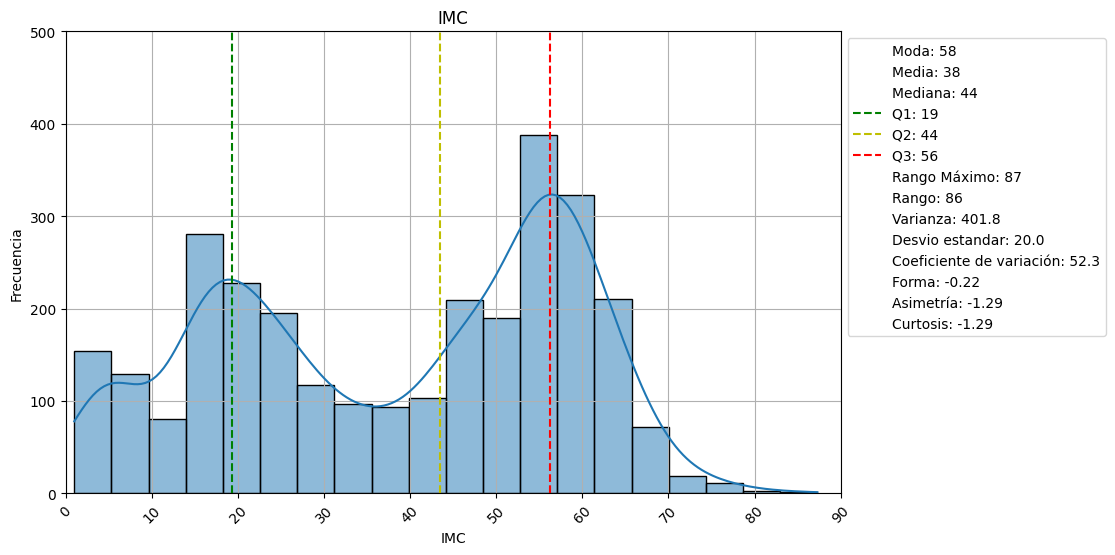

La distribución es Unimodal.
La distribución es Asimétrica Negativa.
La distribución es Platicúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que representa el: 24.91% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 24.91% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 49.69% de los datos.
El rango está comprendido entre 1 y 87.


In [ ]:
# Nombre de la columna
columna = 'IMC'

#  Medidadas de centralización
moda = data[columna].mode().iloc[0]
media = data[columna].mean()
mediana = data[columna].median()

# Cuartiles
Q1 = data[columna].quantile(0.25)
Q2 = data[columna].quantile(0.50)
Q3 = data[columna].quantile(0.75)

# Medidas de Dispersión
rango_max = data[columna].max()
rango_min = data[columna].min()
rango = data[columna].max() - data[columna].min()
varianza = data[columna].var()
desvio_estandar = data[columna].std()
coef_variacion = (desvio_estandar / data[columna].mean()) * 100

# Forma
forma = data[columna].skew()
asimetria = data[columna].kurtosis()
curtosis = data[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((data[columna] >= Q1) & (data[columna] <= Q2)).sum() / len(data[columna]) * 100
concentracion_Q2_Q3 = ((data[columna] >= Q2) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100
concentracion_Q1_Q3 = ((data[columna] >= Q1) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))

sns.histplot(data[columna], bins=20, kde=True)

#Lenyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.0f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.0f}', visible=False)
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.0f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.0f}')
plt.axvline(Q2, color='y', linestyle='--', label=f'Q2: {Q2:.0f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.0f}')

plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.xlim(0, 90)
plt.ylim(0, 500)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
print("La distribución es Unimodal.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")

**La distribución es bimodal. Podemos observar que la misma está concentrada o tiene mayor densidad de datos, entre la mediana (Q2) y el valor IMC=60 (cercano a la moda y a Q3), intervalo que comprende la moda principal. El rango es de 87.**
**La distribución es asimétrica negativa porque la moda>mediana>media.**

**De acuerdo al coeficiente calculado es platicúrtica.**

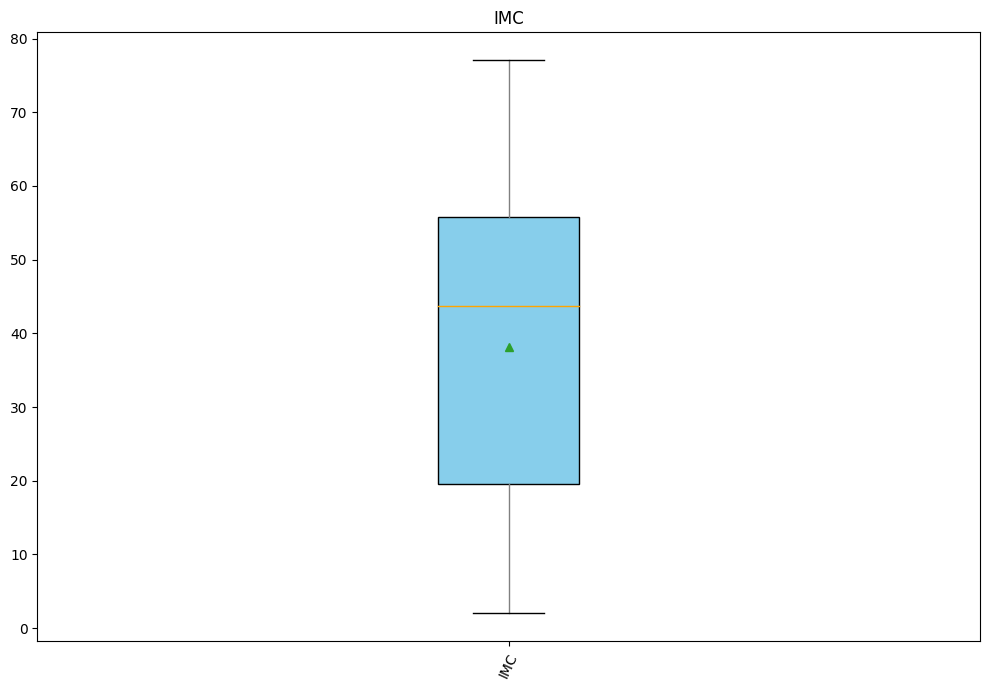

Podemos observar que para IMC, tenemos la siguiente distribución:
Mediana: 44
Media: 38
Q1: 20
Q3: 56
Rango intercuartílico (IQR): 36


In [ ]:
# Columna y datos
columnas_numericas_continuas = ['IMC']
vals_continuas = [data_clean[col].values for col in columnas_numericas_continuas]
nombres_continuas = columnas_numericas_continuas

# Grafico
plt.figure(figsize=(10, 7))

# Estilo de las cajas y los puntos para variables continuas
plt.boxplot(vals_continuas, labels=nombres_continuas, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue'), meanprops=dict(color='green'), medianprops=dict(color='orange'), whiskerprops=dict(color='gray'))
plt.title('IMC')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# Calcula la mediana, cuartiles y valores extremos
mediana = np.median(vals_continuas, axis=1)
media = np.mean(vals_continuas, axis=1)
Q1 = np.percentile(vals_continuas, 25, axis=1)
Q3 = np.percentile(vals_continuas, 75, axis=1)
IQR = Q3 - Q1

# Imprime la información numérica
for i, col in enumerate(nombres_continuas):
    print(f"Podemos observar que para {col}, tenemos la siguiente distribución:")
    print(f"Mediana: {mediana[i]:.0f}")
    print(f"Media: {media[i]:.0f}")
    print(f"Q1: {Q1[i]:.0f}")
    print(f"Q3: {Q3[i]:.0f}")
    print(f"Rango intercuartílico (IQR): {IQR[i]:.0f}")

**Podemos observar que  la caja contiene el 50% de los datos. Dentro de esta, entre Q1 y la mediana (Q2) se encuentran el 25% de los datos y entre la mediana (Q2) y Q3 el restante 25% de los datos.**

**Se observa una caja asimétrica. Entre los cuartiles Q2 y Q3 la distancia es mas grande que entre Q1-Q2, por lo que en el intervalo Q2-Q3 hay mayor densidad de datos.**

# **Análisis Bivariado - Mapas de calor**



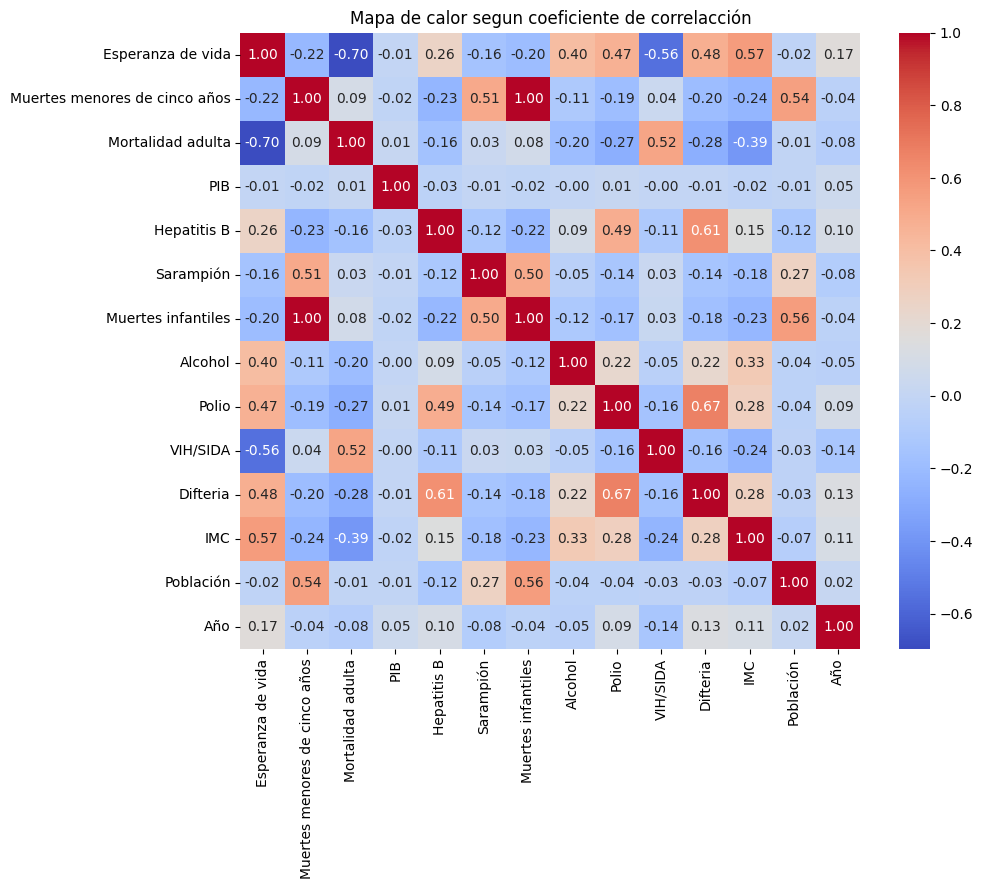

In [ ]:
# Filtrar el DataFrame para incluir solo las variables de interés
selected_variables = ['Esperanza de vida', 'Muertes menores de cinco años', 'Mortalidad adulta',  'PIB', 'Hepatitis B', 'Sarampión', 'Muertes infantiles', 'Alcohol', 'Polio', 'VIH/SIDA', 'Difteria', 'IMC', 'Población', 'Año']
filtered_data = data[selected_variables]

# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor segun coeficiente de correlacción')
plt.show()


In [ ]:
# Seleccionar las variables de interés
selected_variables = ['Esperanza de vida', 'Muertes menores de cinco años', 'Mortalidad adulta',
                      'PIB', 'Hepatitis B', 'Sarampión', 'Muertes infantiles', 'Alcohol',
                      'Polio', 'VIH/SIDA', 'Difteria', 'IMC', 'Población', 'Gasto total',
                      'Gasto en porcentaje', 'Año']

# Seleccionar las correlaciones a estudiar
correlation_pairs = [('Esperanza de vida', 'IMC'),
                     ('Esperanza de vida', 'Alcohol'),
                     ('Esperanza de vida', 'Polio'),
                     ('Esperanza de vida', 'Difteria'),
                     ('Muertes menores de cinco años', 'Población'),
                     ('Sarampión', 'Muertes menores de cinco años'),
                     ('Sarampión', 'Muertes infantiles'),
                     ('Mortalidad adulta', 'VIH/SIDA'),
                     ('Hepatitis B', 'Polio'),
                     ('Hepatitis B', 'Difteria'),
                     ('IMC', 'Alcohol'),
                     ('IMC', 'Polio'),
                     ('Hepatitis B', 'Esperanza de vida')]

# Calcular y mostrar las correlaciones
for pair in correlation_pairs:
    corr = data[pair[0]].corr(data[pair[1]])
    print(f"Correlación entre {pair[0]} y {pair[1]}: {corr}")



Correlación entre Esperanza de vida y IMC: 0.5676935475459864
Correlación entre Esperanza de vida y Alcohol: 0.4048767611266022
Correlación entre Esperanza de vida y Polio: 0.46555580597719837
Correlación entre Esperanza de vida y Difteria: 0.4794948643415855
Correlación entre Muertes menores de cinco años y Población: 0.5444226494309669
Correlación entre Sarampión y Muertes menores de cinco años: 0.5078087068586818
Correlación entre Sarampión y Muertes infantiles: 0.5011283418160033
Correlación entre Mortalidad adulta y VIH/SIDA: 0.5238205079026229
Correlación entre Hepatitis B y Polio: 0.48617077252350094
Correlación entre Hepatitis B y Difteria: 0.6114949490184247
Correlación entre IMC y Alcohol: 0.3304084601640082
Correlación entre IMC y Polio: 0.2845687640869904
Correlación entre Hepatitis B y Esperanza de vida: 0.25676194760492416


In [ ]:
# Correlación entre Esperanza de vida y IMC
correlacion_esperanza_imc, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['IMC'])
print("Correlación Esperanza de vida y IMC:", correlacion_esperanza_imc)

# Correlación entre Esperanza de vida y Alcohol
correlacion_esperanza_alcohol, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Alcohol'])
print("Correlación Esperanza de vida y Alcohol:", correlacion_esperanza_alcohol)

# Correlación entre Esperanza de vida y Polio
correlacion_esperanza_polio, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Polio'])
print("Correlación Esperanza de vida y Polio:", correlacion_esperanza_polio)

# Correlación entre Esperanza de vida y Difteria
correlacion_esperanza_difteria, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Difteria'])
print("Correlación Esperanza de vida y Difteria:", correlacion_esperanza_difteria)

# Correlación entre Muertes menores de cinco años y Población
correlacion_muertes_poblacion, _ = pearsonr(data_clean['Muertes menores de cinco años'], data_clean['Población'])
print("Correlación Muertes menores de cinco años y Población:", correlacion_muertes_poblacion)

# Correlación entre Sarampión y Muertes menores de cinco años
correlacion_sarampion_muertes5, _ = pearsonr(data_clean['Sarampión'], data_clean['Muertes menores de cinco años'])
print("Correlación Sarampión y Muertes menores de cinco años:", correlacion_sarampion_muertes5)

# Correlación entre Sarampión y Muertes infantiles
correlacion_sarampion_muertes_infantiles, _ = pearsonr(data_clean['Sarampión'], data_clean['Muertes infantiles'])
print("Correlación Sarampión y Muertes infantiles:", correlacion_sarampion_muertes_infantiles)

# Correlación entre Mortalidad adulta y VIH/SIDA
correlacion_mortalidad_vih, _ = pearsonr(data_clean['Mortalidad adulta'], data_clean['VIH/SIDA'])
print("Correlación Mortalidad adulta y VIH/SIDA:", correlacion_mortalidad_vih)

# Correlación entre Hepatitis B y Polio
correlacion_hepatitisb_polio, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Polio'])
print("Correlación Hepatitis B y Polio:", correlacion_hepatitisb_polio)

# Correlación entre Hepatitis B y Difteria
correlacion_hepatitisb_difteria, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Difteria'])
print("Correlación Hepatitis B y Difteria:", correlacion_hepatitisb_difteria)

# Correlación entre IMC y Alcohol
correlacion_imc_alcohol, _ = pearsonr(data_clean['IMC'], data_clean['Alcohol'])
print("Correlación IMC y Alcohol:", correlacion_imc_alcohol)

# Correlación entre IMC y Polio
correlacion_imc_polio, _ = pearsonr(data_clean['IMC'], data_clean['Polio'])
print("Correlación IMC y Polio:", correlacion_imc_polio)

# Correlación entre Hepatitis B y Esperanza de vida
correlacion_hepatitisb_esperanza, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Esperanza de vida'])
print("Correlación Hepatitis B y Esperanza de vida:", correlacion_hepatitisb_esperanza)


Correlación Esperanza de vida y IMC: 0.542041587691577
Correlación Esperanza de vida y Alcohol: 0.40271832172735333
Correlación Esperanza de vida y Polio: 0.32729440310492874
Correlación Esperanza de vida y Difteria: 0.34133123426064094
Correlación Muertes menores de cinco años y Población: 0.6586796907106562
Correlación Sarampión y Muertes menores de cinco años: 0.51750556334194
Correlación Sarampión y Muertes infantiles: 0.5326798315447481
Correlación Mortalidad adulta y VIH/SIDA: 0.5506907453932769
Correlación Hepatitis B y Polio: 0.46333079917183967
Correlación Hepatitis B y Difteria: 0.588989926952583
Correlación IMC y Alcohol: 0.35339620539045224
Correlación IMC y Polio: 0.18626796512105634
Correlación Hepatitis B y Esperanza de vida: 0.1999352763975776


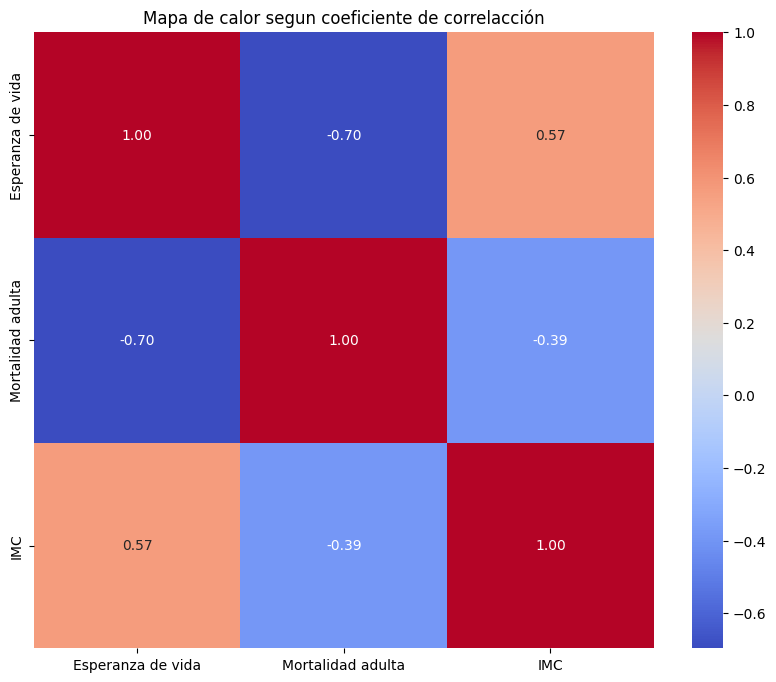

In [ ]:
# Filtrar el DataFrame para incluir solo las variables de interés
selected_variables = ['Esperanza de vida', 'Mortalidad adulta', 'IMC']
filtered_data = data[selected_variables]

# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor segun coeficiente de correlacción')
plt.show()

In [ ]:
# Correlación entre Esperanza de vida y Mortalidad adulta
correlacion_esperanza_mortalidad, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Mortalidad adulta'])
print("Correlación Esperanza de vida y Mortalidad adulta:", correlacion_esperanza_mortalidad)

# Correlación entre Esperanza de vida y Alcohol
correlacion_esperanza_alcohol, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Alcohol'])
print("Correlación Esperanza de vida y Alcohol:", correlacion_esperanza_alcohol)

# Correlación entre Mortalidad adulta y Alcohol
correlacion_mortalidad_alcohol, _ = pearsonr(data_clean['Mortalidad adulta'], data_clean['Alcohol'])
print("Correlación Mortalidad adulta y Alcohol:", correlacion_mortalidad_alcohol)

Correlación Esperanza de vida y Mortalidad adulta: -0.7025230623069736
Correlación Esperanza de vida y Alcohol: 0.40271832172735333
Correlación Mortalidad adulta y Alcohol: -0.17553508575848253


# **Análisis Bivariado - Gráficos de Dispersión**


**A continuación, seleccionamos las variables númericas que tienen mayor correlación con Esperanza de Vida a través del análisis de los coeficientes de Pearson. Asimismo, las variables Alcohol, ICM y Mortalidad adulta no son colineales o sus correlaciones tienen bajos coeficientes de Pearson.**

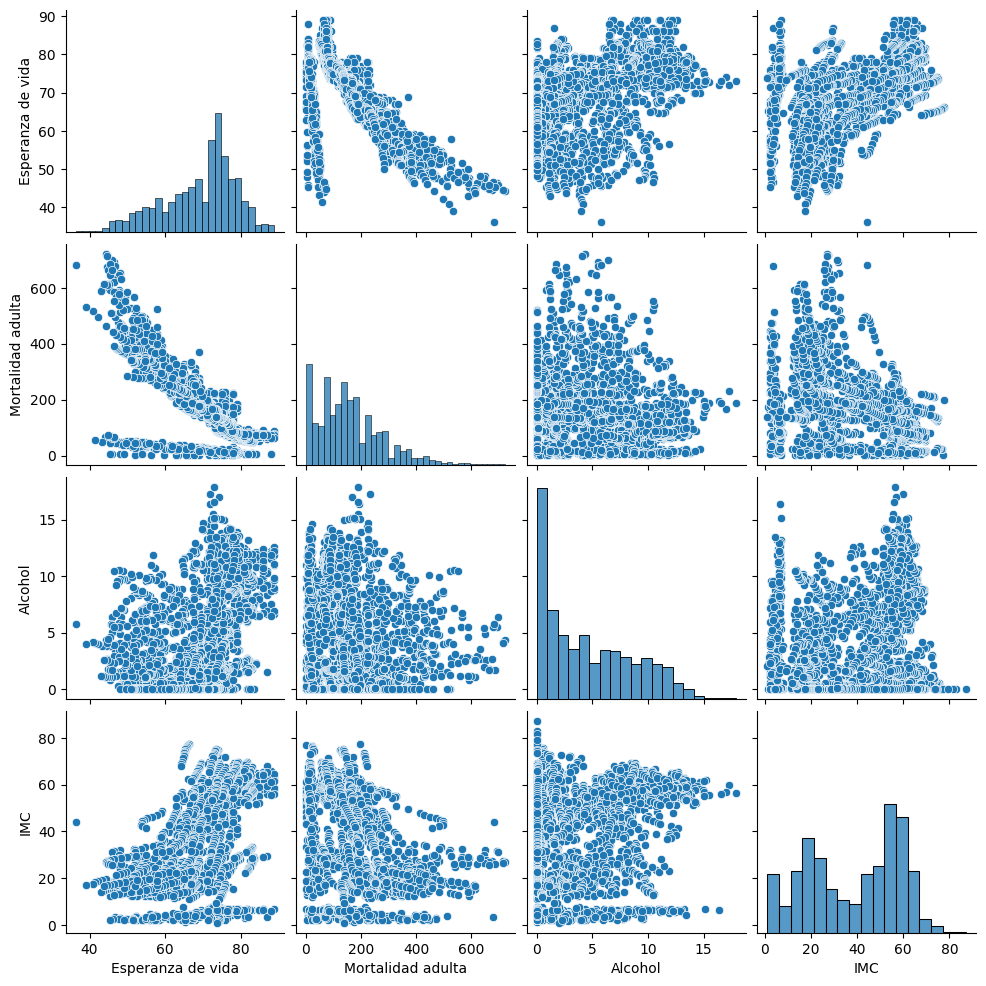

In [ ]:
# Seleccionamos las columnas numéricas
numeric_columns = ['Esperanza de vida', 'Mortalidad adulta', 'Alcohol', 'IMC']

# Visualizar los datos utilizando
sns.pairplot(data, vars=numeric_columns)

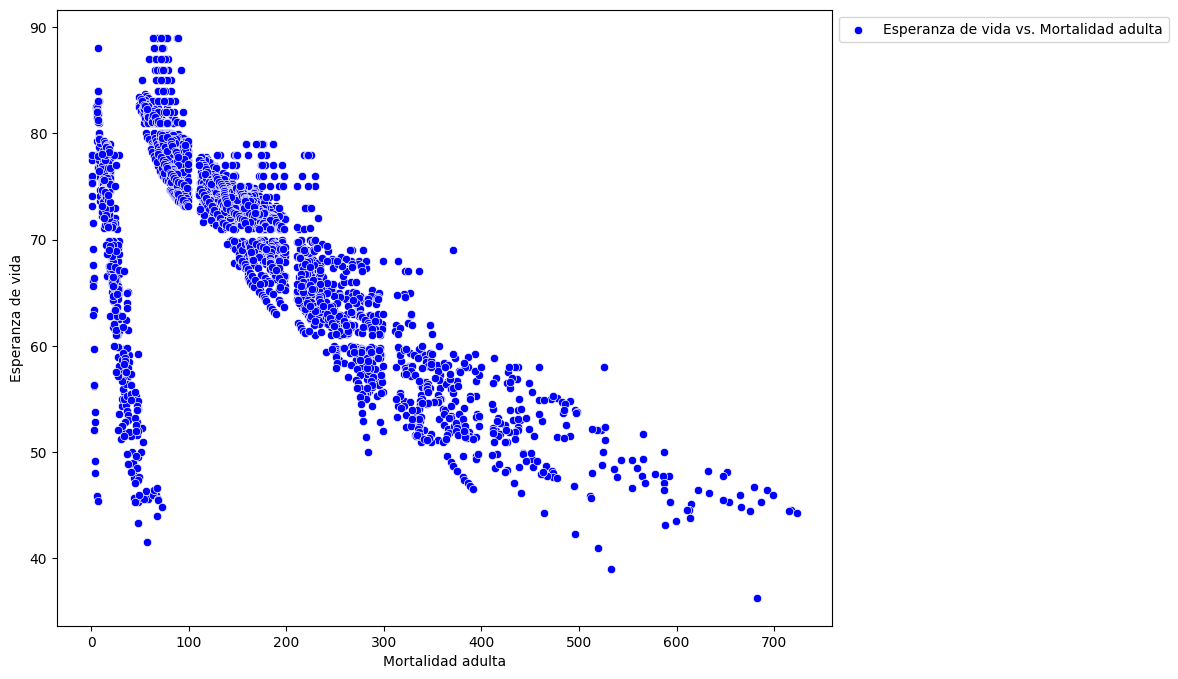

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Mortalidad adulta", y="Esperanza de vida", data=data, label="Esperanza de vida vs. Mortalidad adulta", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

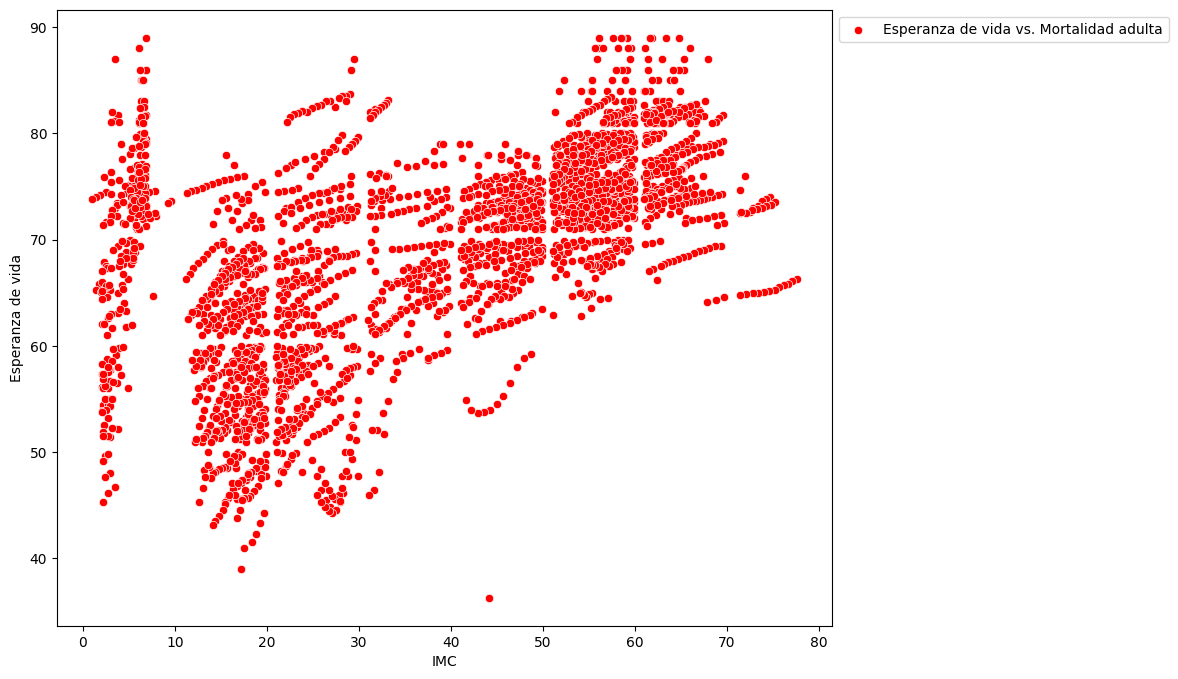

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="IMC", y="Esperanza de vida", data=data, label="Esperanza de vida vs. Mortalidad adulta", color='red')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

#**MODELO DE REGRESION LINEAL SIMPLE**

De acuerdo a los gráficos de dispersión, mapas de calor y coeficientes de Pearson que surgen de las columnas del Dataframe "data", se han seleccionado las siguientes variables:

**Variable dependiente continua**
Y = Esperanza de vida

**Variables independientes o predictoras continuas**
X1 = Mortalidad adulta y X2: IMC (Indice de masa corporal)

La correlación entre la variable Mortalidad adulta (independiente) y Esperanza de vida (dependiente) tiene un índice de correlación de Pearson alto (-0.7), mientras que la correlación entre la variables independiente IMC y la variable dependiente Esperanza de vida tiene un índice de Pearson moderado de 0.57. Por otro lado, se descartó la variable independiente Alcohol porque la correlación con Esperanza de vida tiene un índice de Pearson asociado relativamente bajo (0.39) y se observa alta dispersión en el gráfico de dispersión. Las variables IMC y Mortalidad adulta no son colineales.

#**Preparación de los datos**

A continuación, se seleccionan las columnas de interés (Esperanza de vida, Mortalidad adulta e IMC) y se genera una sub-base de datos con las mismas.

In [ ]:
# Seleccionar solo las columnas deseadas
sub_data = data [['Esperanza de vida', 'Mortalidad adulta', 'IMC']]

In [ ]:
print(sub_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Esperanza de vida  2928 non-null   float64
 1   Mortalidad adulta  2928 non-null   float64
 2   IMC                2904 non-null   float64
dtypes: float64(3)
memory usage: 69.0 KB
None


In [ ]:
sub_data.shape

(2938, 3)

A partir del análisis exploratorio univariado y bivariado se eliminan los valores anómalos (outliers) de la variable Esperanza de vida (dependiente) y Mortalidad adulta (independiente).
De acuerdo al boxplot Esperanza de vida, el extremo del bigote inferior es de 49, por lo tanto se eliminan los outliers debajo de este mínimo.
Por otro lado, Mortalidad adulta tiene muchos outliers con valores superiores al límite del bigote superior. De esta manera se eliminan los valores anómalos mayores a 452. Por otra parte, debajo del valor Mortalidad adulta = 90 se genera una correlación linal secundaria con la variable a predecir Esperanza de vida. En el caso de la variable independiente IMC no hay necesidad de eliminar outliers.

In [ ]:
sub_data_filtered = sub_data[
    (sub_data['Mortalidad adulta'] <= 452) & (sub_data['Mortalidad adulta'] >= 90) & (sub_data['Esperanza de vida'] >= 40) & (sub_data['IMC'])]

In [ ]:
print(sub_data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1854 entries, 0 to 2925
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Esperanza de vida  1854 non-null   float64
 1   Mortalidad adulta  1854 non-null   float64
 2   IMC                1854 non-null   float64
dtypes: float64(3)
memory usage: 57.9 KB
None


In [ ]:
sub_data_filtered.shape

(1854, 3)

**Gráfico de Dispersión entre Esperanza de vida y Mortalidad adulta luego de remover los outliers**

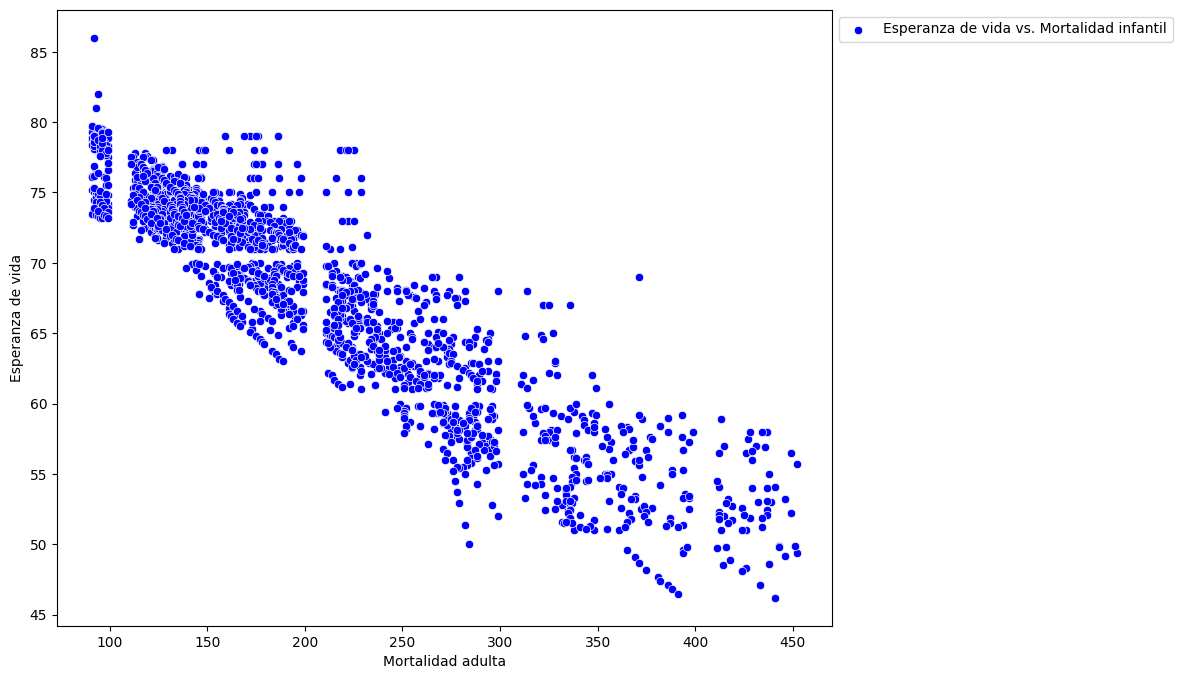

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Mortalidad adulta", y="Esperanza de vida", data=sub_data_filtered, label="Esperanza de vida vs. Mortalidad infantil", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

#**Definición del conjunto de entrenamiento y prueba**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = sub_data_filtered[['Mortalidad adulta','IMC']]
#X = variables predictoras [['Mortalidad adulta'] , ['IMC']]
y = sub_data_filtered['Esperanza de vida']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1236,
                                        shuffle      = True
                                    )

#**Creación del modelo**

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     4661.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:54:49   Log-Likelihood:                -3634.1
No. Observations:                1483   AIC:                             7274.
Df Residuals:                    1480   BIC:                             7290.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                81.4838      0.32

**Interpretación**

Si se plantea la forma general como:
Y(esperanza de vida)= Bo + B1 x X1(Mortalidad adulta) + B2 x X2(IMC), entonces según los coeficientes estimados son:

Esperanza de vida = 81.4838 - 0.0760 x Mortalidad adulta + 0.0586 x (IMC). Estos Betas son estimaciones, no son los Betas reales y van cambiando con las muestras.

Cada uno de los Beta estimados tiene un desvío estandar asociado. Std (Bo)= 0.322, Std(B1) = 0.001 y Std (B2) = 0.004.

El test global indica que el área debajo de la curva del estadísco, Prob(F-statistic) es cero (0). Como es menor que alfa=0.05, entonces se rechaza la hipótesis nula (Ho) que indica que todos los Betas son iguales a cero (si esto se cumpliera no habría linealidad).

Luego, se lleva adelante el test independiente de cada Beta usando el estadístico t, bajo la distribución t-student. El P-Valor deriva del estadístico t y se corresponde con el área debajo de la curva. Para Bo, B1 y B2 el P-valor es cero. Por lo tanto el P-Valor < alfa (0.05) para cada B, por lo tanto se rechaza la hipótesis nula (Ho: Bi=0) para cada uno de ellos.

El R-cuadrado (R-squared) indica que tanto porcentaje de la variabilidad de la variable **Expectativa de vida** estoy prediciendo. Por lo tanto, como R-squared=0.863 se está prediciendo el 86% de la variabilidad de la muestra tomada. Esto significa que el restante 14% de la variabilidad de la variable dependiente no se estaría explicando con las variables independientes. El R-squared ajustado corrije el aumento del error residual por incremento del número de variables independientes aunque, en este caso, tiene un valor de 0.863



**Calculamos predicción y residuos**

In [ ]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
prediccion_test = modelo.predict(exog = sm.add_constant(X_test, prepend=True))
residuos_train   = prediccion_train - y_train

**Gráficos: Diagnóstico de Residuos**

<ipython-input-38-41be233f6c4a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


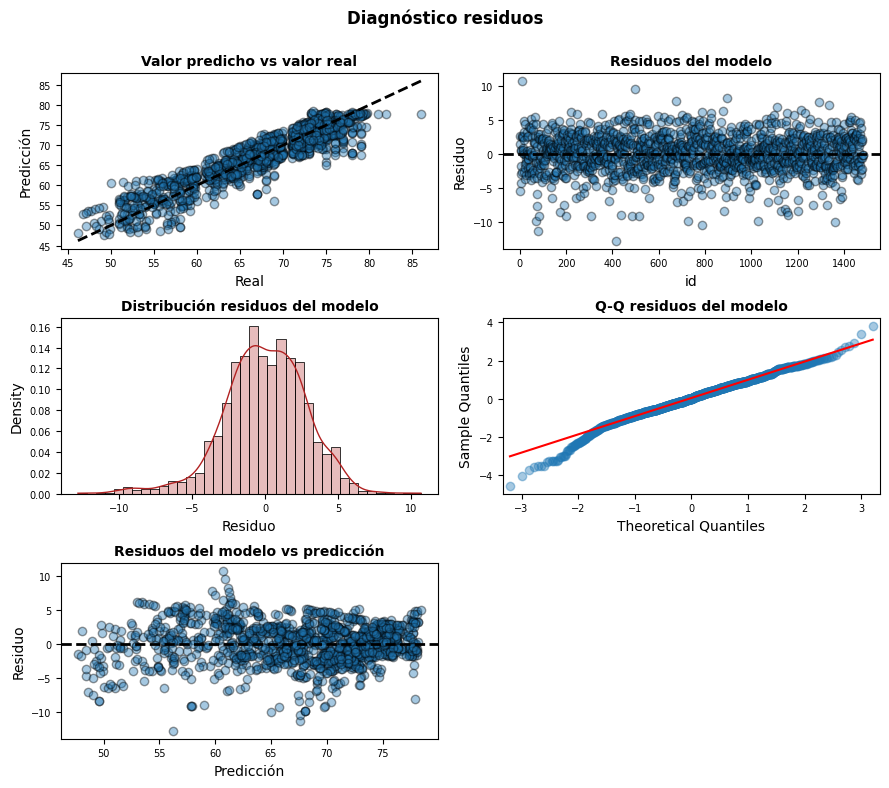

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

**INTERPRETACIÓN**:

(1) Gráfico Valor Predicho vs. Valor Real de la variable Esperanza de vida (del conjunto test): La correlación entre los valores predichos y los reales es bastante buena, con algunos outliers entre 55-60, 65-70 y un valor anómalo arriba de 80 de la variable Valor Real.

(2) Gráfico Residuo (Valor Real - Valor de Predicción) vs. Id (muestras del conjunto test): El supuesto es que los residuos sigan una distribución normal Ei-N(0,1), donde los valores se concentren u oscilen alrededor de la media=0. El intervalo del estadístico entre -2 y 2 acumula el 97,5% de los datos según la tabla Normal estandarizada. Se quisiera que la mayoría de los residuos oscilen entre -2 y 2, sin embargo oscilan entre -3 y 3, con una considerable cantidad por fuera de este intervalo. Los residuos por fuera de -2 y 2 se relacionan al 14% de la variabilidad de la variable Esperanza de vida que no se explica por las variables independientes.

(3) Distribución Residuos del modelo: La distribución tiene forma de campana, se aproxima bastante bien a una distribución gaussiana.

(4) Q-Q residuos del modelo: El eje x representa los valores de los residuos y en el eje y se representan los valores de los residuos si se comportaran con distribución normal. Los puntos se ajustan bastante bien a la línea lo que indica un comportamiento normal. Los residuos por arriba de 1.75 y por debajo de -1.75 se alejan de la recta e indica que por arriba y debajo de estos límites la distribución de residuos no es normal.

(5) Residuos del modelo vs. Predicción: Se comparan los valores predichos de Esperanza de vida vs. el residuo asociado. Entre 60 y 70 es donde se encuentra la mayor cantidad de datos que se desvían de la recta, es decir donde el modelo predice con mayor error.

#**Conclusión**

El modelo de regresión lineal, predice bastante bien los datos de la variable dependiente Esperanza de vida a partir de las variables independientes Mortalidad adulta e IMC. De acuerdo al tamaño del conjunto de datos se tomo
un subconjunto de entrenamiento de 80% y otro de testing de 20% (también podría haberse tomado valores de 70%, 30% respectivamente).
La clave de que el modelo explique el 86% de la variabilidad de la variable a predecir (Esperanza de vida), que haya una muy buena correlación entre los valores predichos y reales radica en haber hecho una correcta elección y preparación de los datos:
(1) Haber hecho una buena elección de las variables dependiente e independientes a partir del análisis exploratorio univariado y bivariado, considerando por supuesto que los coeficientes de Pearson sean altos entre la variable dependiente e independiente y que entre las independientes sean bajos (no haya colinealidad).
(2) Haber analizado los box plots para detectar los outliers en todas las variables y cross plots para identificar relaciones lineales secundarias entre las variables Esperanza de vida y Mortalidad adulta (por debajo de 90 de Mortalidad adulta). La sub-base filtrada sin outliers aumento la correlación positiva entre Esperanza de vida y Mortalidad adulta.